# Customer Churn Prediction

Dataset can be downloaded from kaggle: "https://www.kaggle.com/datasets/blastchar/telco-customer-churn"

## Import Packages

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
df=pd.read_csv(r"C:\Users\HP\CustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']


## Data Understanding
### 1. Classification Label
<p>Churn - Whether the customer churned or not (Yes, No)</p>

### 2. Services each customer has sign up
<p><strong>PhoneService</strong> - whether the customer has a phone service or not (Yes,No)</p>
<p><strong>MultipleLines</strong> - whether the customer has a multiple line or not (Yes, No, No phone service)</p>
<p><strong>InternetService</strong> - type of internet service the customer has (DSL, Fiber Optic, No)</p>
<p><strong>OnlineSecurity</strong> - whether the customer has a online security or not (Yes, No)</p>
<p><strong>OnlineBackup</strong> - whether the customer has a online backup or not (Yes, No)</p>
<p><strong>DeviceProtection</strong> - whether the customer has a device protection or not (Yes, No)</p>
<p><strong>TechSupport</strong> - whether the customer has a tech support or not (Yes,No)</p>
<p><strong>StreamingTV</strong> - whether the customer has a streaming TV (Yes,No)</p>
<p><strong>StreamingMovies</strong> - whether the customer has a streaming movies (Yes,No)</p>

### 3. Customer account information
<p><strong>Tenure</strong> - how long customer has stayed in company</p>
<p><strong>Contract</strong> - type of contract customer has (Month-to-Month, One Year, Two Year)</p>
<p><strong>PaperlessBilling</strong> - whether the customer has a paperless billing (Yes,No)</p>
<p><strong>PaymentMethod</strong> - payment method use by customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</p>
<p><strong>MonthlyCharges</strong> - amount charged to the customer monthly</p>
<p><strong>TotalCharges</strong> - the total amount charge to the customer</p>

### 4. Customer demographic info
<p><strong>CustomerID</strong> - Unique value for each customer</p>
<p><strong>gender</strong> - type of gender customer has (Male,Female)</p>
<p><strong>SeniorCitizen</strong> - whether the customer is a senior citizen (Yes,No)</p>
<p><strong>Partner</strong> - whether the customer has a partner or not (Yes, No)</p>
<p><strong>Dependents</strong> - whether the customer has a dependents or not (Yes,No)</p>

## Exploratory Data Analysis (EDA)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* The average customer tenure with the company is <strong>32 months</strong>, and <strong>75%</strong>of customers have a tenure of less than <strong>55 months.</strong>

* The average monthly charges are USD <strong>64.76</strong>, with <strong>25%</strong> of customers paying more than USD <strong>89.85</strong>.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data type for the 'TotalCharges' column should be changed to float.

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
# Delete "automatic" from PaymentMethod
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [13]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

### Target Values Visualization

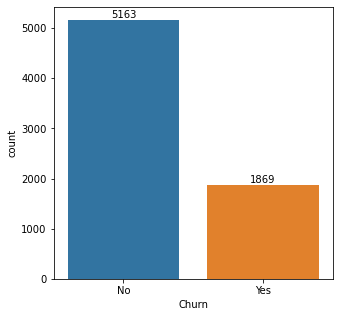

In [14]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"])
ax.bar_label(ax.containers[0])
plt.show()

In [15]:
def plot_categorical_to_target(df,categorical_values, target,name_fig):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target)
        ax.set_title(column)
    plt.savefig(name_fig,dpi=300)
    return plt.show()

In [16]:
import math

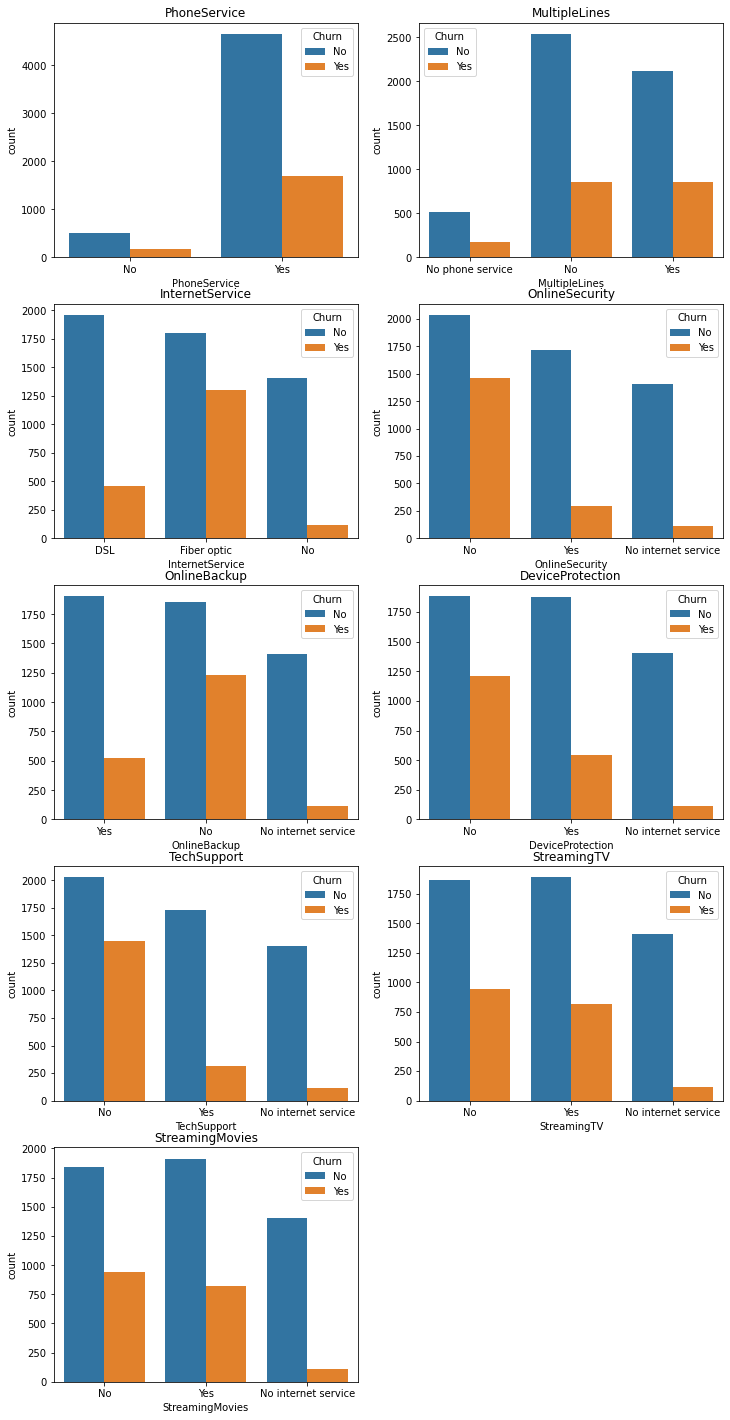

In [17]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn", "Services.png")

* The moderately higher churn rate for customers who have the phone service.

* Customers with internet service fiber optic have a higher churn rate compared to DSL and No.

* The much higher churn rate for customers without online security.

* Customers who don't have access to tech support tend to leave more frequently than those who do.

* Customers without online backup and device protection have a higher churn rate

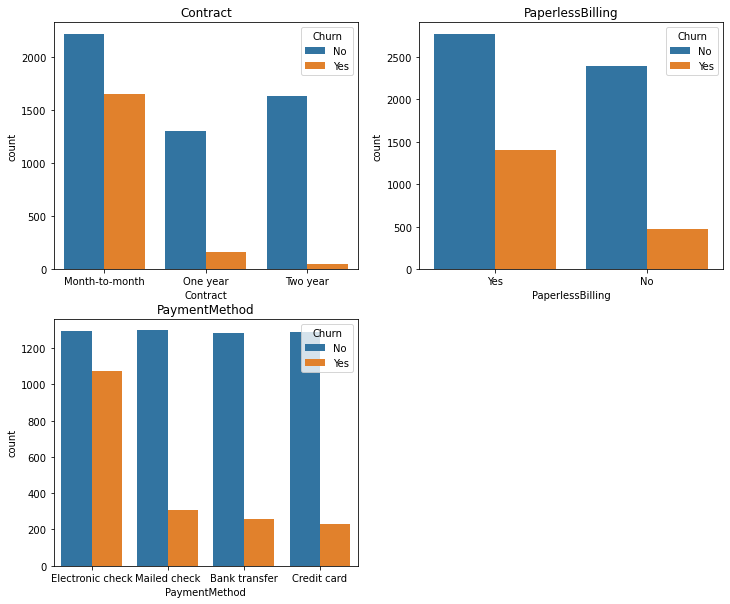

In [18]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn", "CustomerAccount.png")

* <strong>Contract</strong>: Customers with <strong>month-to-month</strong> contracts have <strong>higher churn rates</strong> compared to clients with <strong>yearly</strong> contracts.

* <strong>PaperlessBilling</strong>: Customers who receive paper bills have higher churn rates compared to customers who do not receive paper bills.

* <strong>PaymentMethod</strong>: Customers with a payment method using <strong>electronic check</strong> have higher churn rates compared to those using mailed checks, bank transfers, and credit cards.

### Analysis Customer Account Information

In [19]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

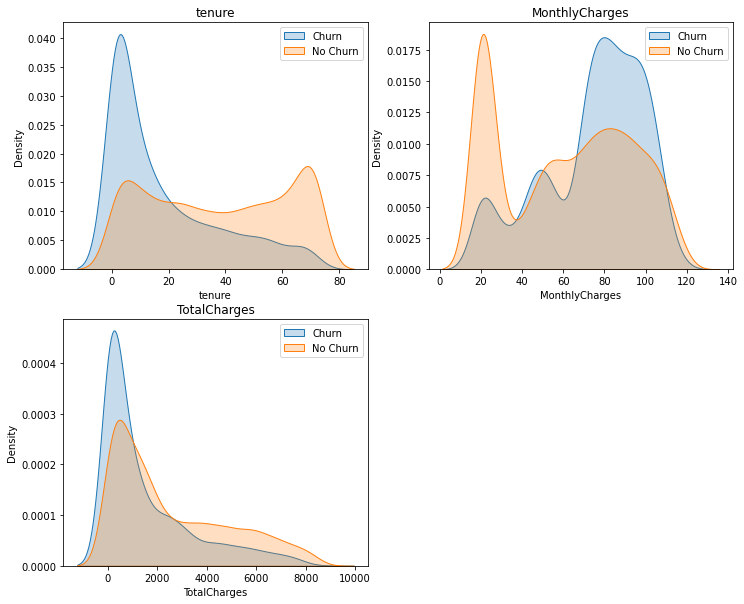

In [20]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

* <strong>Tenure</strong>: Customers with <strong>low tenure</strong> tend to have a <strong>higher churn rate</strong>.

* <strong>MonthlyCharges</strong>: There is a <strong>high churn rate</strong> when customers pay <strong>high monthly charges</strong>.

### Analysis Customer Demographic Info

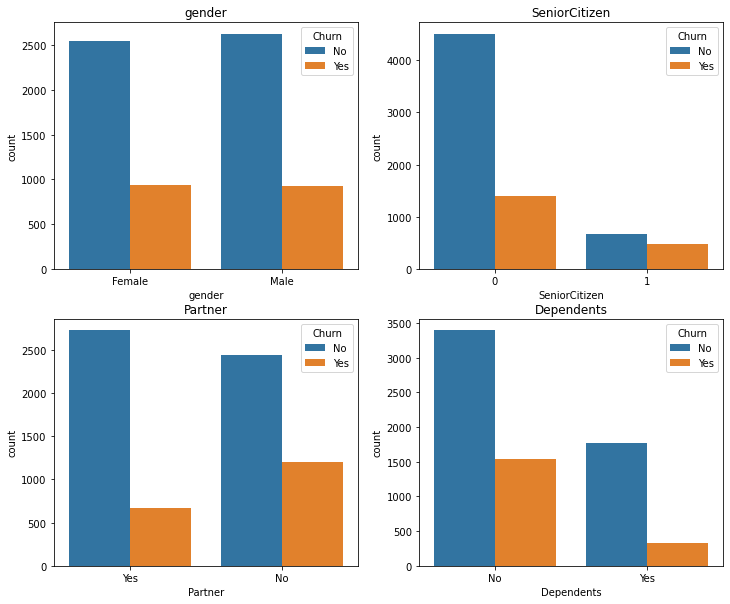

In [21]:
customer_demo_info = ["gender","SeniorCitizen","Partner","Dependents"]
plot_categorical_to_target(df, customer_demo_info,"Churn","Demographic_Info.png")

* <strong>Gender</strong>: Gender does not show significant differences between customers who churned and those who did not.

* <strong>SeniorCitizen</strong>: <strong>Younger</strong> customers have <strong>higher churn rates</strong> compared to senior customers.

* <strong>Partner</strong>: Customers who <strong>do not have a partner</strong> are more likely to <strong>churn</strong> compared to those who have a partner.

* <strong>Dependents</strong>: Customers <strong>without dependents</strong> have <strong>higher churn rates</strong> compared to those with dependents.

### Check Outliers Using Boxplot

In [22]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df)
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

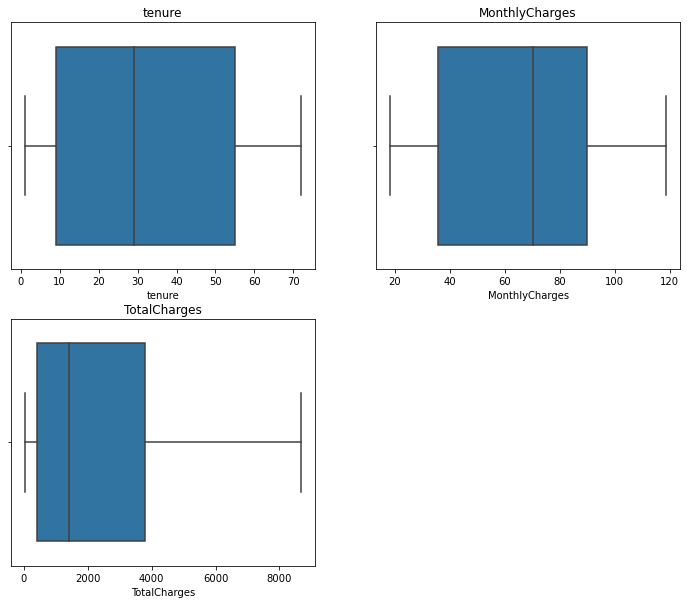

In [23]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

## Feature Engineering
### Label Encoding for Binary Features

In [24]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

### One Hot Encoding

In [25]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

### Feature Rescaling : Min-Max Scaling

In [26]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [27]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

### Correlation Analysis

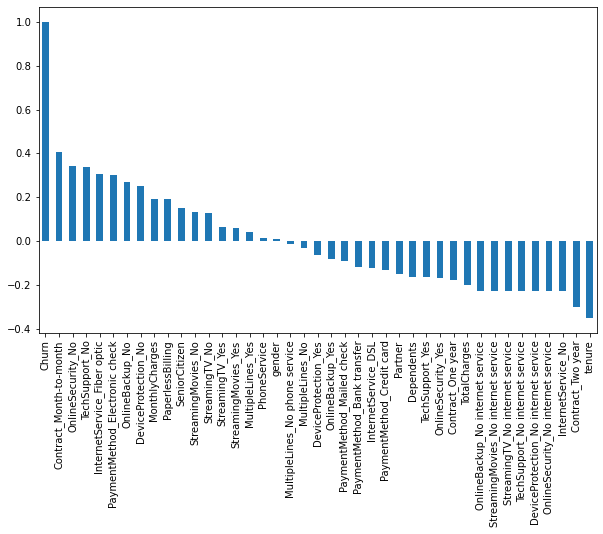

In [28]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

In [29]:
df.head()

,tenure,MonthlyCharges,TotalCharges,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,7590-VHVEG,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0.464789,0.385075,0.215867,5575-GNVDE,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0.014085,0.354229,0.010310,3668-QPYBK,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0.619718,0.239303,0.210241,7795-CFOCW,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0.014085,0.521891,0.015330,9237-HQITU,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0


### Train Test Split

In [30]:
X = df.drop(columns = ["Churn","customerID"])
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 40), (1407, 40), (5625,), (1407,))

## Model Selection And Evaluation Model
### Make Functions for Model Evaluation Metrics

In [31]:
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending=False)
    
    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")
    
    bottom_10_weights = weights[len(weights)-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")

In [32]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()
    
    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train,y_train)}")
    return print("\n")

In [33]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr,label=f"{classifier_name}")
    plt.title(f"{classifier_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    return print(f"AUC Score (ROC):{roc_auc_score(y_test,y_pred_prob)}")

In [34]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall,precision, label=f"{classifier_name}")
    plt.title(f"{classifier_name}-ROC Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    f1_score_result, auc_score = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f"f1 Score : {f1_score_result} \n AUC Score (PR) : {auc_score}")

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

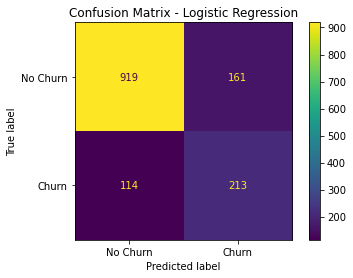

Accuracy Score Test = 0.8045486851457001
Accuracy Score Train = 0.8048




In [36]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_logreg,logreg,"Logistic Regression")

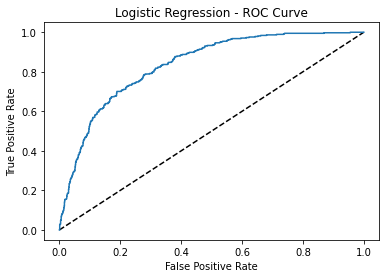

AUC Score (ROC):0.834748745929772


In [37]:
roc_curve_auc_score(X_test,y_test,y_pred_logreg_proba, "Logistic Regression")

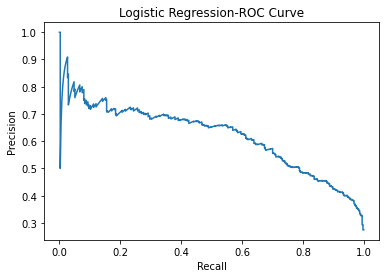

f1 Score : 0.6077032810271041 
 AUC Score (PR) : 0.6185957002131842


In [38]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_logreg,y_pred_logreg_proba,"Logistic Regression")

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Create and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_decision_tree_proba = decision_tree.predict_proba(X_test)

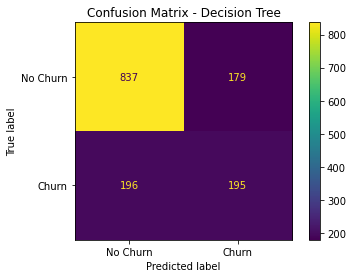

Accuracy Score Test = 0.7334754797441365
Accuracy Score Train = 0.9987555555555555




In [40]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,y_pred_decision_tree ,decision_tree,"Decision Tree")

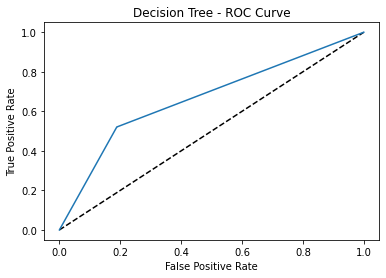

AUC Score (ROC):0.6660782415579979


In [41]:
roc_curve_auc_score(X_test,y_test,y_pred_decision_tree_proba, "Decision Tree")

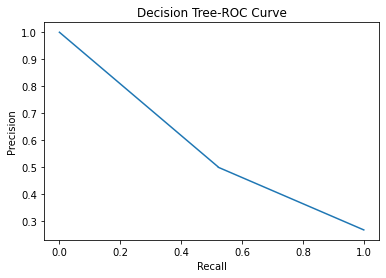

f1 Score : 0.5098039215686275 
 AUC Score (PR) : 0.5739996896154763


In [42]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_decision_tree,y_pred_decision_tree_proba,"Decision Tree")

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with regularization parameters
# Adjust these hyperparameters to control the tree's complexity
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5, random_state=42)

# Train the Decision Tree classifier on the training data
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_decision_tree_proba = decision_tree.predict_proba(X_test)

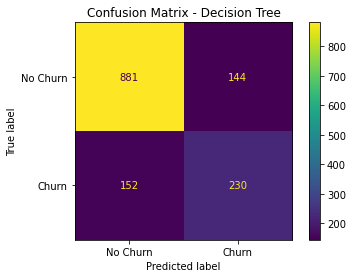

Accuracy Score Test = 0.7896233120113717
Accuracy Score Train = 0.7985777777777778




In [44]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,y_pred_decision_tree ,decision_tree,"Decision Tree")

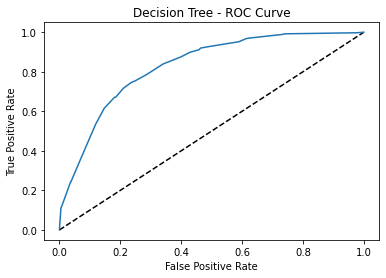

AUC Score (ROC):0.828879593727837


In [45]:
roc_curve_auc_score(X_test,y_test,y_pred_decision_tree_proba, "Decision Tree")

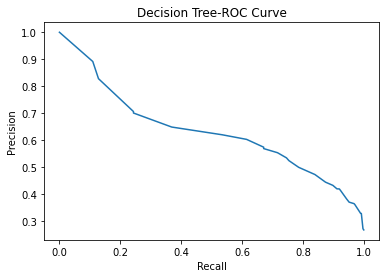

f1 Score : 0.6084656084656085 
 AUC Score (PR) : 0.6320983177637756


In [46]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_decision_tree,y_pred_decision_tree_proba,"Decision Tree")

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_random_forest = random_forest.predict(X_test)

# You can also get class probabilities if needed
y_pred_random_forest_proba = random_forest.predict_proba(X_test)

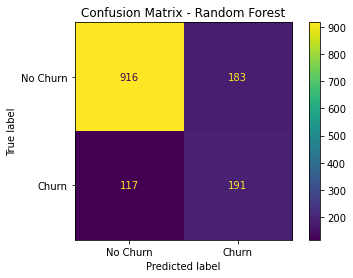

Accuracy Score Test = 0.7867803837953091
Accuracy Score Train = 0.9987555555555555




In [48]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,y_pred_random_forest,random_forest,"Random Forest")

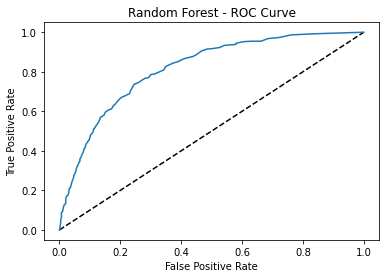

AUC Score (ROC):0.8153035393511447


In [49]:
roc_curve_auc_score(X_test,y_test,y_pred_random_forest_proba, "Random Forest")

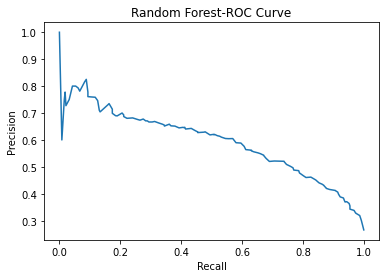

f1 Score : 0.5601173020527859 
 AUC Score (PR) : 0.5926912741521816


In [50]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_random_forest,y_pred_random_forest_proba,"Random Forest")

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the Random Forest classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_random_forest = random_forest.predict(X_test)

# You can also get class probabilities if needed
y_pred_random_forest_proba = random_forest.predict_proba(X_test)

# Now you can use y_pred_random_forest and y_pred_random_forest_proba for evaluation and analysis

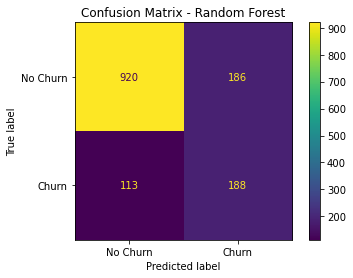

Accuracy Score Test = 0.7874911158493249
Accuracy Score Train = 0.9980444444444444




In [52]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,y_pred_random_forest,random_forest,"Random Forest")

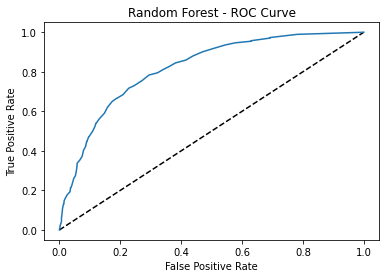

AUC Score (ROC):0.8175075451284096


In [53]:
roc_curve_auc_score(X_test,y_test,y_pred_random_forest_proba, "Random Forest")

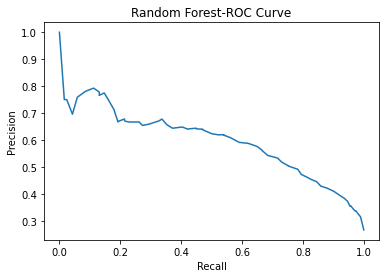

f1 Score : 0.5570370370370371 
 AUC Score (PR) : 0.5966516019046613


In [54]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_random_forest,y_pred_random_forest_proba,"Random Forest")

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=4, random_state=42)

# Train the Random Forest classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_random_forest = random_forest.predict(X_test)

# You can also get class probabilities if needed
y_pred_random_forest_proba = random_forest.predict_proba(X_test)

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
#random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=4, random_state=42)
random_forest = RandomForestClassifier(
    n_estimators=200,  # Increase the number of trees
    max_depth=10,      # Increase max_depth to allow for deeper trees
    min_samples_leaf=2,  # Reduce min_samples_leaf for finer splits
    random_state=42
)
# Train the Random Forest classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_random_forest = random_forest.predict(X_test)

# You can also get class probabilities if needed
y_pred_random_forest_proba = random_forest.predict_proba(X_test)

In [57]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_re, y_train_re = smote.fit_resample(X_train, y_train)

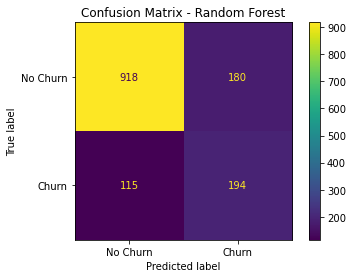

Accuracy Score Test = 0.7903340440653873
Accuracy Score Train = 0.7883777239709443




In [58]:
confusion_matrix_plot(X_train_re,y_train_re,X_test,y_test,y_pred_random_forest,random_forest,"Random Forest")

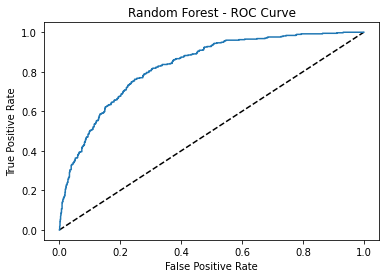

AUC Score (ROC):0.8308661755646551


In [59]:
roc_curve_auc_score(X_test,y_test,y_pred_random_forest_proba, "Random Forest")

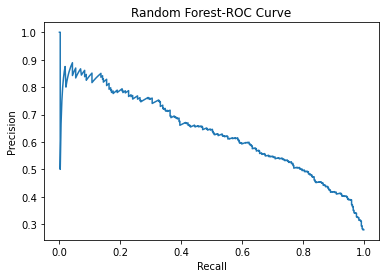

f1 Score : 0.5680819912152268 
 AUC Score (PR) : 0.6338792752613288


In [60]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_random_forest,y_pred_random_forest_proba,"Random Forest")

Epoch 1/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4649 - accuracy: 0.7728 - val_loss: 0.4426 - val_accuracy: 0.7832
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7904 - val_loss: 0.4378 - val_accuracy: 0.7910
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.7941 - val_loss: 0.4378 - val_accuracy: 0.7967
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8004 - val_loss: 0.4380 - val_accuracy: 0.7925
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.7977 - val_loss: 0.4378 - val_accuracy: 0.7925
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8018 - val_loss: 0.4341 - val_accuracy: 0.7939
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8069 - val_loss: 0.4350 - val_accuracy: 0.7868
Epoch 

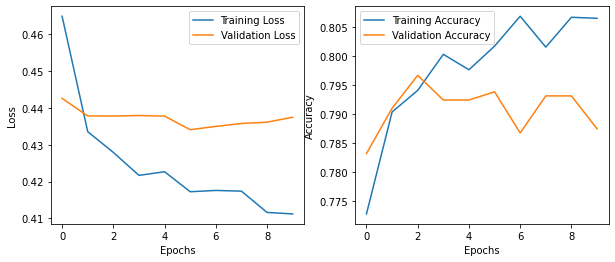

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of features
    layers.Dense(128, activation='relu'),     # Hidden layer with 128 units and ReLU activation
    layers.Dropout(0.3),                      # Dropout layer to reduce overfitting
    layers.Dense(64, activation='relu'),      # Another hidden layer with 64 units and ReLU activation
    layers.Dropout(0.3),                      # Dropout layer to reduce overfitting
    layers.Dense(2, activation='softmax')     # Output layer with 2 units (binary classification) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',              # Optimizer (e.g., Adam)
              loss='sparse_categorical_crossentropy',  # Loss function (for classification)
              metrics=['accuracy'])           # Evaluation metric (accuracy)

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Optionally, you can plot the training history (loss and accuracy over epochs)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

44/44 [==============================] - 0s 1ms/step


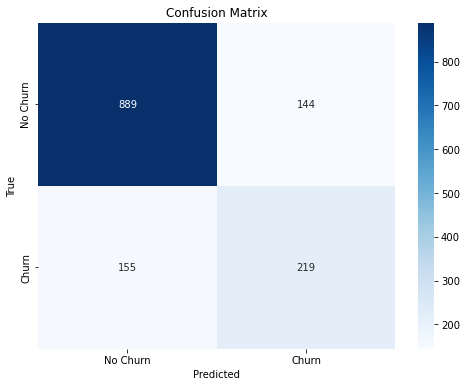

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert predicted probabilities to class labels

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

44/44 [==============================] - 0s 1ms/step


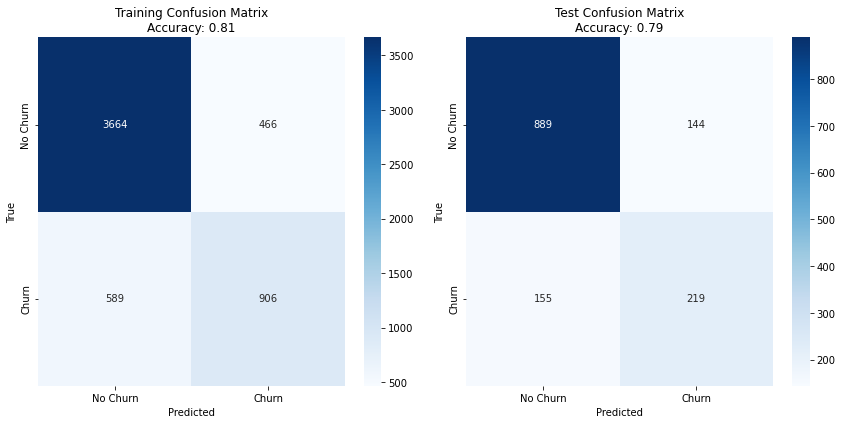

Training Accuracy: 0.81
Test Accuracy: 0.79


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_train_pred_classes = y_train_pred.argmax(axis=-1)
y_test_pred_classes = y_test_pred.argmax(axis=-1)

# Calculate the confusion matrix for training and test data
confusion_mtx_train = confusion_matrix(y_train, y_train_pred_classes)
confusion_mtx_test = confusion_matrix(y_test, y_test_pred_classes)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_classes)
test_accuracy = accuracy_score(y_test, y_test_pred_classes)

# Create subplots for confusion matrices and display training and test accuracy
plt.figure(figsize=(12, 6))

# Confusion Matrix for Training Data
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mtx_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Training Confusion Matrix\nAccuracy: {train_accuracy:.2f}')

# Confusion Matrix for Test Data
plt.subplot(1, 2, 2)
sns.heatmap(confusion_mtx_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Test Confusion Matrix\nAccuracy: {test_accuracy:.2f}')

plt.tight_layout()
plt.show()

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [65]:
# Assuming you have a feature matrix X and target vector y

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_regression, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.80454869 0.81165601 0.78876245 0.80796586 0.80156472]
Mean Accuracy: 0.8028995441407067


In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Step 3: Perform hyperparameter tuning using GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7)}  # Hyperparameter grid for regularization strength
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameter value after tuning
best_c = grid_search.best_params_['C']

# Step 4: Initialize the Logistic Regression model with the best hyperparameter
logistic_regression_tuned = LogisticRegression(C=best_c, max_iter=1000, random_state=42)

# Step 5: Perform cross-validation with the tuned model
cv_scores = cross_val_score(logistic_regression_tuned, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Step 6: Fit the tuned model on the training data
logistic_regression_tuned.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred_test = logistic_regression_tuned.predict(X_test)
y_pred_train = logistic_regression_tuned.predict(X_train)

# Step 8: Calculate and print test and train accuracies
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

# Step 9: Calculate and print the confusion matrix for test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)

# Step 10: Calculate and print the confusion matrix for train data
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Train Data):\n", confusion_matrix_train)


Cross-validation scores: [0.81688889 0.808      0.792      0.79555556 0.82311111]
Mean Accuracy: 0.8071111111111111
Test Accuracy: 0.7889125799573561
Train Accuracy: 0.8085333333333333
Confusion Matrix (Test Data):
 [[917 116]
 [181 193]]
Confusion Matrix (Train Data):
 [[3699  431]
 [ 646  849]]


Cross-validation scores: [0.81688889 0.808      0.792      0.79555556 0.82311111]
Mean Accuracy: 0.8071111111111111
Test Accuracy: 0.7889125799573561
Train Accuracy: 0.8085333333333333


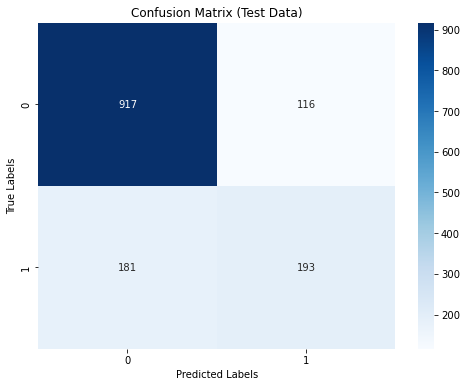

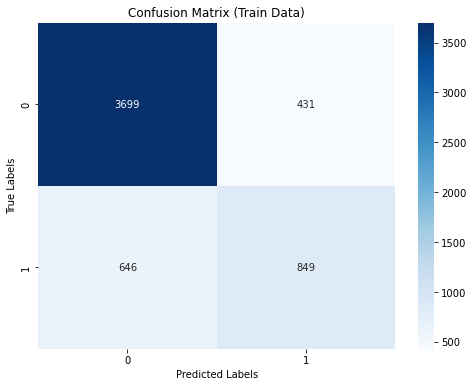

In [67]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Step 3: Perform hyperparameter tuning using GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7)}  # Hyperparameter grid for regularization strength
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameter value after tuning
best_c = grid_search.best_params_['C']

# Step 4: Initialize the Logistic Regression model with the best hyperparameter
logistic_regression_tuned = LogisticRegression(C=best_c, max_iter=1000, random_state=42)

# Step 5: Perform cross-validation with the tuned model
cv_scores = cross_val_score(logistic_regression_tuned, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Step 6: Fit the tuned model on the training data
logistic_regression_tuned.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred_test = logistic_regression_tuned.predict(X_test)
y_pred_train = logistic_regression_tuned.predict(X_train)

# Step 8: Calculate and print test and train accuracies
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

# Step 9: Calculate and plot the confusion matrix for test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 10: Calculate and plot the confusion matrix for train data
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Train Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Cross-validation scores: [0.77155556 0.77777778 0.75644444 0.75111111 0.78844444]
Mean Accuracy: 0.7690666666666666
Test Accuracy: 0.7505330490405118
Train Accuracy: 0.8574222222222222


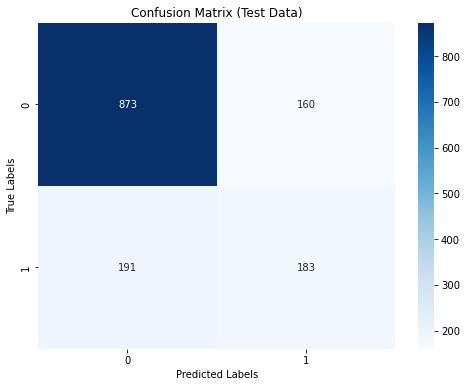

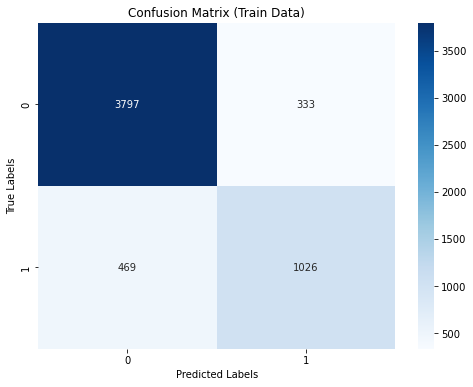

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

# Assuming you have a feature matrix X and target vector y
# Replace X and y with your actual data

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Step 3: Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}  # Hyperparameter grid
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters after tuning
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# Step 4: Initialize the Decision Tree model with the best hyperparameters
decision_tree_tuned = DecisionTreeClassifier(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)

# Step 5: Perform cross-validation with the tuned model
cv_scores = cross_val_score(decision_tree_tuned, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Step 6: Fit the tuned model on the training data
decision_tree_tuned.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred_test = decision_tree_tuned.predict(X_test)
y_pred_train = decision_tree_tuned.predict(X_train)

# Step 8: Calculate and print test and train accuracies
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

# Step 9: Calculate and plot the confusion matrix for test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 10: Calculate and plot the confusion matrix for train data
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Train Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Cross-validation scores: [0.81066667 0.81066667 0.79466667 0.80266667 0.81422222]
Mean Accuracy: 0.8065777777777777
Test Accuracy: 0.7995735607675906
Train Accuracy: 0.872


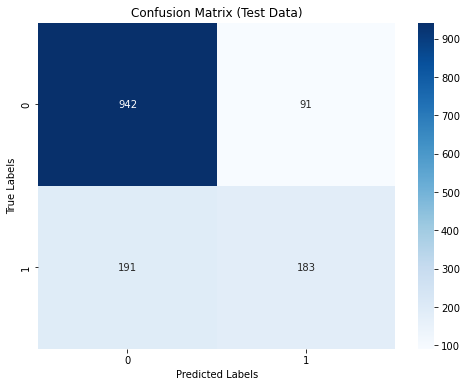

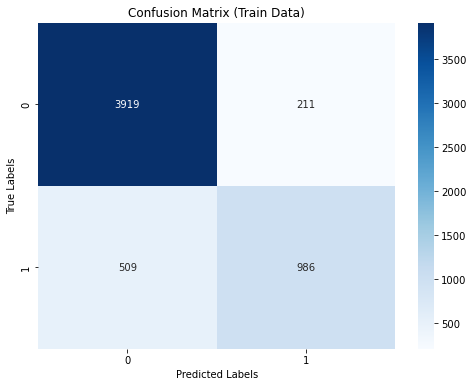

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

# Assuming you have a feature matrix X and target vector y
# Replace X and y with your actual data

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Step 3: Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}  # Hyperparameter grid
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters after tuning
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# Step 4: Initialize the Random Forest model with the best hyperparameters
random_forest_tuned = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)

# Step 5: Perform cross-validation with the tuned model
cv_scores = cross_val_score(random_forest_tuned, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Step 6: Fit the tuned model on the training data
random_forest_tuned.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred_test = random_forest_tuned.predict(X_test)
y_pred_train = random_forest_tuned.predict(X_train)

# Step 8: Calculate and print test and train accuracies
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

# Step 9: Calculate and plot the confusion matrix for test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 10: Calculate and plot the confusion matrix for train data
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Train Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()